# Regresión Lineal: Costo de un incidente de seguridad.

En este ejercicio se explica los fundamentos básicos de la regresión Lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el corto de un incidente de seguridad en base a el número que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

# 1.- Generación de DataSet

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np. random.randn(100, 1)

print("La longitud del DataSet es: ", len(X))

La longitud del DataSet es:  100


# 2.- Visualización del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

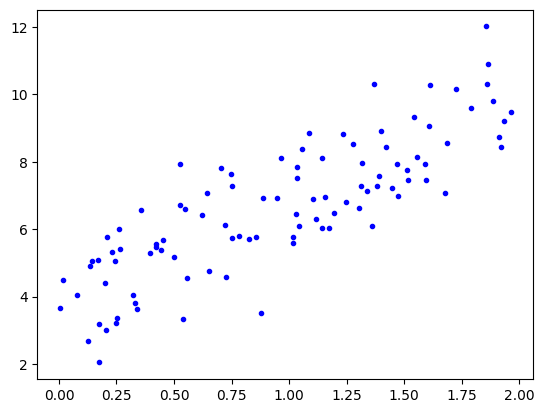

In [3]:
plt.plot(X, y, "b.")
plt.show()

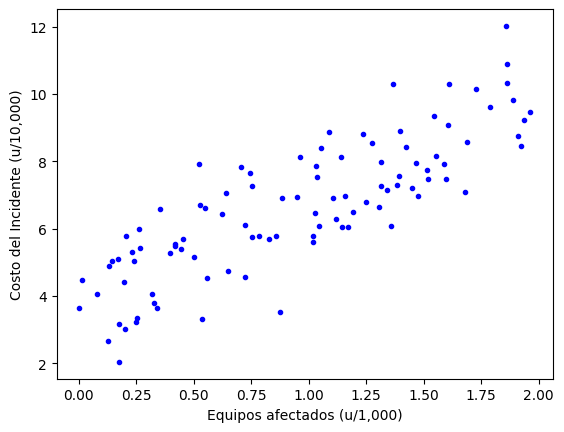

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costo del Incidente (u/10,000)")
plt.show()

# 3.- Modificación del dataset

In [5]:
import pandas as pd


In [6]:
data = {'No_Equipos_Afectados': X.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,0.651146,4.754099
1,0.963210,8.117936
2,0.134135,4.900146
3,1.305642,6.638936
4,0.621945,6.425184
5,0.949610,6.926925
6,0.784435,5.786701
7,0.396877,5.287349
8,1.194170,6.486131
9,1.467974,7.949638


In [7]:
# Escalado del Número de equipos afectados 
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 100
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype('int')
# Escalado del costo
df['Costo'] = df['Costo'] * 1000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,65,4754
1,96,8117
2,13,4900
3,130,6638
4,62,6425
5,94,6926
6,78,5786
7,39,5287
8,119,6486
9,146,7949


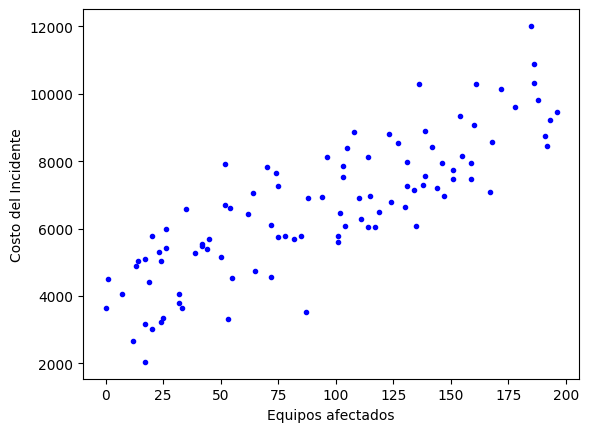

In [8]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del Incidente")
plt.show()

## 4.- Construcción de Modelo

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Construcción del modelo y ajuste de la funcion de Hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1, 1), df ['Costo'].values)

LinearRegression()

In [13]:
# Parámetro Tetha 0
lin_reg.intercept_

np.float64(3835.3251999400313)

In [14]:
#Parámetro Tetha 1
lin_reg.coef_

array([29.84310297])

In [15]:
# Predicción para el valot minimo y maximo para el conjunto de datos de entrenamineto
X_min_max = np.array([[df["No_Equipos_Afectados"].min()], [df["No_Equipos_Afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

<function matplotlib.pyplot.show(close=None, block=None)>

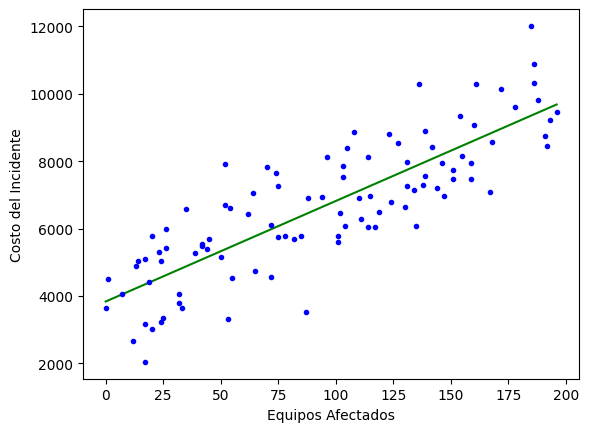

In [17]:
# Representación gráfica de la función de hipótesis generada.
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df ['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show

# 5.- Predicción de nuevos ejemplos

In [18]:
x_new = np.array([[1300]]) # Numero de equipos afectados.
# Predicción de costo que tendría del incidente.
Costo = lin_reg.predict(x_new)
print("El costo del incidente sería :$", int(Costo[0]))

El costo del incidente sería :$ 42631


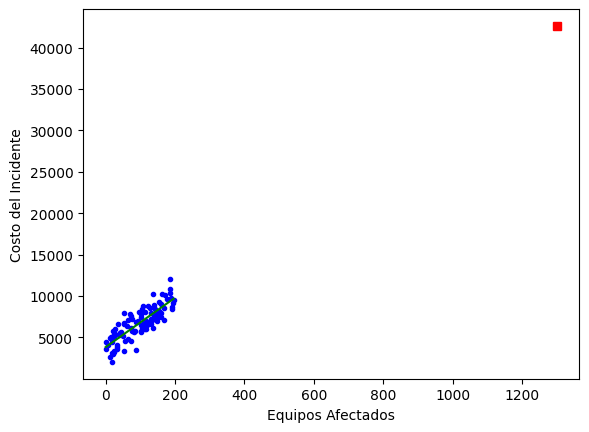

In [19]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, Costo, "rs")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()